## 

In [43]:
using LinearAlgebra, Jevo, Jedi, Plots, DataFrames, CSV, Statistics, LambertW, Measures
Jedi.default_gr!()

Plots.GRBackend()

Import Metadata.

In [72]:
parameters = Dict()
open("../outputs/2020_12_02_script1_sub_METADATA.txt") do file
    for ln in eachline(file)
        par, val = split(ln, "=")
        parameters[par] = val   
    end
end
parameters

Dict{Any,Any} with 9 entries:
  "f0"          => "[0.01, 0.025, 0.05]"
  "nu"          => "0"
  "fl"          => "0"
  "steps"       => "1000000"
  "N"           => "1000"
  "repetitions" => "1000"
  "l"           => "[10, 15, 20]"
  "rescue"      => "true"
  "rho"         => "[0.0, 0.1, 0.5, 1.0]"

In [77]:
df = CSV.read("../outputs/2020_12_02_script1_sub.csv", DataFrame)
first(df, 5)

,gamma,l,rho,f0
,Float64,Float64,Float64,Float64
1,0.0,10.0,0.0,0.01
2,0.0,10.0,0.1,0.01
3,0.0,10.0,0.5,0.01
4,0.0,10.0,1.0,0.01
5,0.0,15.0,0.0,0.01


In [81]:
sum(df.gamma)

0.0

In [78]:
function get_gamma(df, l, rho, f0)
    return df[(df.l .== l) .& (df.rho .== rho) .& (df.f0 .== f0), :gamma]./2l
end


function get_gamma_filtered(df, l, rho, f0, gamma)
    return df[(df.l .== l) .& (df.rho .== rho) .& (df.f0 .== f0) .& (df.gamma .< 2l*gamma), :gamma]./2l
end

get_gamma_filtered (generic function with 1 method)

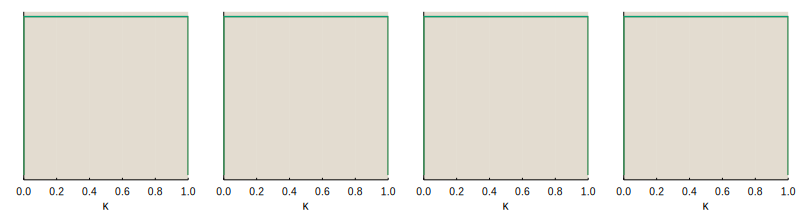

In [79]:
p_list = []
l=20
for rho in [0, 0.1, 0.5, 1]
    p = Jedi.histogram(
        data=get_gamma(df, l, rho, 0.01), 
        line_kwargs=Dict{Any, Any}(
            :xlims=>(0, 1), 
            :ylabel=>"", 
            :yticks=>[],
            :xlabel=>"κ"
            ),
        density=true,
        
    )
    p = Jedi.histogram(
        data=get_gamma(df, l, rho, 0.025), 
        density=true,
        p=p
    )
    p = Jedi.histogram(
        data=get_gamma(df, l, rho, 0.05), 
        density=true,
        p=p
    )
    push!(p_list, p)
end

plot(p_list..., size=(800, 220), layout=(1,4), bottom_margin=4mm)
#savefig("../figures/figure1_conceptl20.pdf")

In [80]:
p = plot(ylabel="", xlabel="", legend=:topleft, size=(220, 220))
c = palette(:tab10)
l = 10
for (i, f0) in enumerate([0.01, 0.025, 0.05])
    scatter!(p, [0, 0.1, 0.5, 1], [mean(get_gamma_filtered(df, l, rho, f0, 1)) for rho in [0, 0.1, 0.5, 1]], label=f0, color=c[i])
    theory = []
    for rho in 0:0.1:1
        Q = theory_dist(l, rho, f0, 1000)
        push!(theory, sum(collect(0:0.01:1) .* Q )/sum(Q))
    end
    plot!(p, 0:0.1:1, 3/4 .-[1/2l*lambertw(4/3 * f0 * 1000 * l * exp(10)/(1+rho)) for rho in 0:0.1:1], color=c[i])
    plot!(p, 0:0.1:1,theory,linestyle=:dash, color=c[i])
end
savefig("../figures/figure1_conceptl$(l)_2.pdf")

In [36]:
function theory_dist(l, rho, f0, N)
    gamma = collect(0:0.01:1)
    f = Jevo.fermi_fitness(f0=f0, l=l)
    Q = exp.(-1/2 *l .*  (gamma .- 3/4).^2 / (3/16) .+ 2N/(1+rho) .* Jevo.fitness.(gamma * 2l, f))
    return Q
end



theory_dist (generic function with 1 method)

In [37]:
theory_dist(10, 0, 0.01, 1000)

101-element Array{Float64,1}:
  129.8192348313595
  187.5568332728372
  267.81522827424186
  377.4474298493674
  524.1892060880162
  715.9491422720033
  959.4637947466281
 1258.144709188219
 1609.089933339716
 1999.5662160941813
 2403.823490681325
 2781.789808012348
 3081.6843492589423
    ⋮
    0.5929700119280076
    0.5488364465003385
    0.505286514719938
    0.46271851727233504
    0.42148327159172283
    0.38188095538645145
    0.3441595103833972
    0.30851451575704203
    0.2750903970280102
    0.24398280203939904
    0.2152419515806476
    0.1888767583904471

In [12]:
for i in palette(:tab10)
    i
end

In [ ]:
pallete